In [2]:
import pandas as pd

In [3]:
path = '//Users//sevvalgencel//Desktop//'

In [4]:
df = pd.read_csv(path + 'train.csv',sep = ',')

In [5]:
df.head()

id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0

<Axes: >

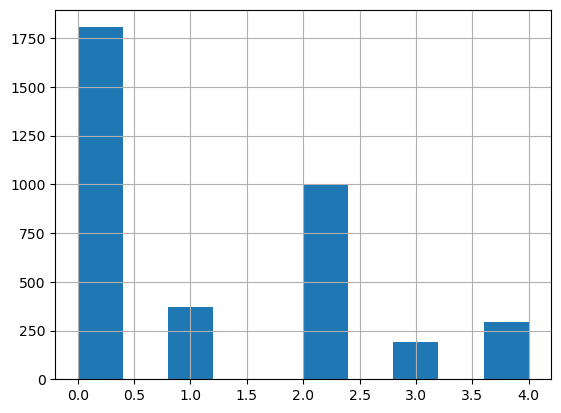

In [6]:
df['diagnosis'].hist()

In [7]:
df['diagnosis'].value_counts()

diagnosis
0    1805
2     999
1     370
4     295
3     193
Name: count, dtype: int64

In [8]:
import os

In [9]:
files = os.listdir( path + 'train_images')

In [10]:
files

['46923eea9a4e.png',
 '2d7666b8884f.png',
 '419406328dcd.png',
 '50840c36f0b4.png',
 'c9ea9d5eab65.png',
 '30cab14951ac.png',
 '4a5a6efc0bef.png',
 '17f6c7072f61.png',
 '94076a9fb9b5.png',
 'a8582e346df0.png',
 'b09101adb478.png',
 '3b58b02c89ed.png',
 'd74ccc796517.png',
 'aa9cfe639ef1.png',
 'a821b6ecef33.png',
 '4246ed634f25.png',
 '345b1f0abbba.png',
 'ae5d31979f19.png',
 '283c3aeba594.png',
 'cab3dfa7962d.png',
 '3810040096cb.png',
 '90a786abe58e.png',
 '35d6c4c50072.png',
 'c8a3eb9a5b52.png',
 '0a1076183736.png',
 '437cbec4a3f8.png',
 '3710ff45299c.png',
 '71e43b4f8ba6.png',
 '67f5d89da548.png',
 '354b8911d6ed.png',
 '64bad93fde3f.png',
 'a94da3d3b5c0.png',
 'e30a890600e1.png',
 '408ea9d5e082.png',
 '09662e462531.png',
 'cc964bf04dbc.png',
 '1b4625877527.png',
 '9cedf5c7016b.png',
 '9878db94d9f3.png',
 '6b07971c3bf6.png',
 '7116128c65ab.png',
 'e38f3a65b02b.png',
 '7b29e3783919.png',
 'a14fcf84bfe1.png',
 'e0b5a982a018.png',
 '42b9c1977681.png',
 '026dcd9af143.png',
 'd85588ff2eb

In [11]:
len(files)

3662

In [12]:
!pip install opencv-python
import cv2

In [13]:
img_list = []

for i in files[0:20]:

    image = cv2.imread(path + 'train_images/' + i)
    image = cv2.resize(image,(400,400))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_list.append(image)

In [14]:
len(img_list)

20

In [15]:
import matplotlib.pyplot as plt

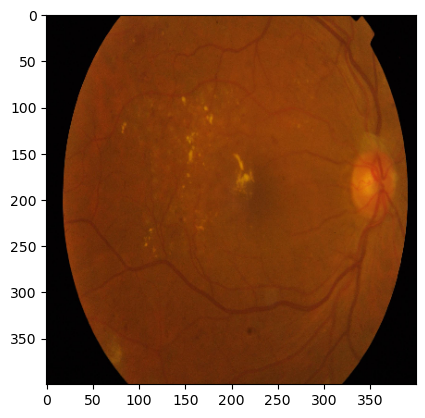

In [16]:
plt.imshow(img_list[0])

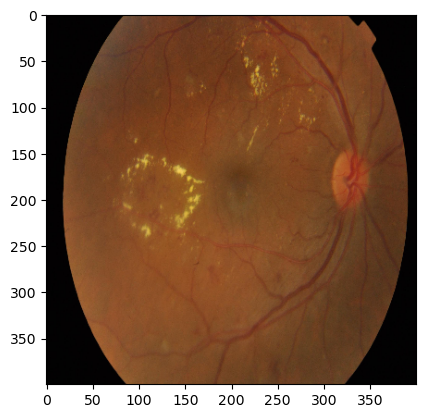

In [17]:
plt.imshow(img_list[4])

#### Threshold uygulayabilmek için görüntümüzü siyah-beyaz renklere çevirdik.

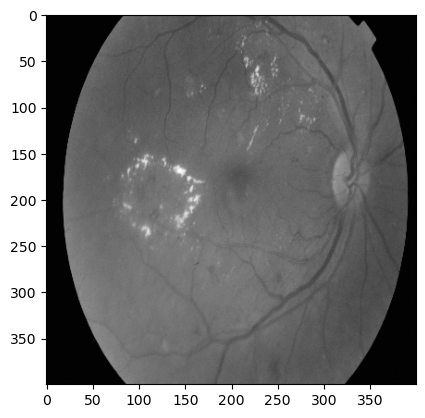

In [19]:
kopya = img_list[4].copy()
kopya = cv2.cvtColor(kopya, cv2.COLOR_RGB2GRAY)
plt.imshow(kopya, cmap='gray')

In [20]:
kopya.shape

(400, 400)

In [21]:
blur = cv2.GaussianBlur(kopya,(5,5),0)

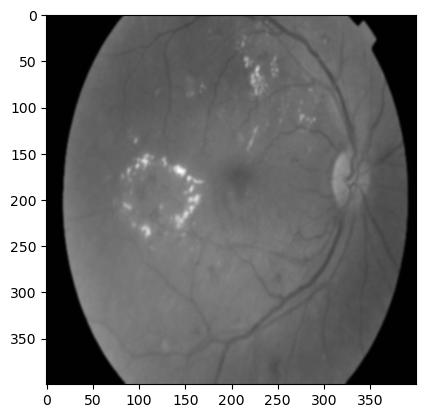

In [22]:
plt.imshow(blur,cmap='gray')

In [23]:
thresh = cv2.threshold(blur,10,255, cv2.THRESH_BINARY)[1]

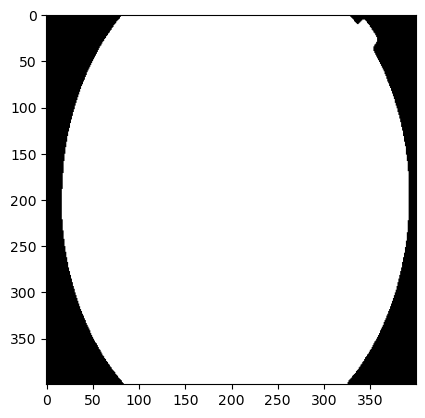

In [24]:
plt.imshow(thresh, cmap='gray')

In [25]:
kontur = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [26]:
 kontur = kontur[0][0]

In [27]:
kontur.shape

(412, 1, 2)

In [28]:
kontur = kontur[:,0,:]

In [29]:
kontur.shape

(412, 2)

In [30]:
kontur[335]


array([378,  99], dtype=int32)

In [31]:
kontur[:,0].argmin()

103

In [32]:
kontur[111]

array([ 21, 251], dtype=int32)

In [33]:
sol = tuple(kontur[kontur[:,0].argmin()])
sağ = tuple(kontur[kontur[:,0].argmax()])
üst = tuple(kontur[kontur[:,1].argmin()])
alt = tuple(kontur[kontur[:,1].argmax()])

In [34]:
sol, sağ, üst, alt

((17, 189), (391, 222), (83, 0), (84, 399))

In [35]:
x1 = sol[0]
y1 = üst[1]
x2 = sağ[0]
y2 = alt[1]

In [36]:
x1, y1, x2, y2

(17, 0, 391, 399)

In [37]:
orijinal = img_list[4].copy()

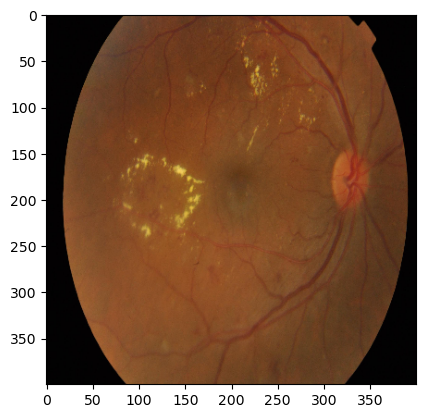

In [38]:
plt.imshow(orijinal)

In [39]:
crop_ilk = orijinal[y1:y2 , x1:x2]

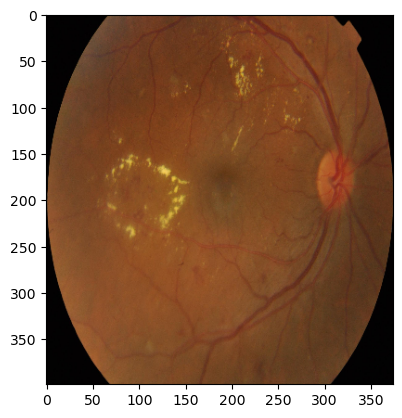

In [40]:
plt.imshow(crop_ilk)

In [41]:
crop_ilk.shape

(399, 374, 3)

In [42]:
crop_ilk = cv2.resize(crop_ilk,(400,400))

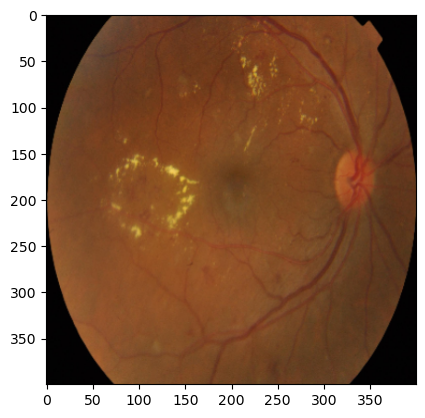

In [43]:
plt.imshow(crop_ilk)

In [44]:
x = int(x2-x1)*4//100
y = int(y2-y1)*5//100

In [45]:
x,y

(14, 19)

In [46]:
crop_son = orijinal[y1+y : y2-y , x1+x : x2-x]

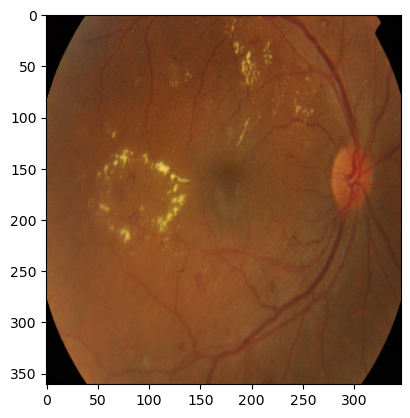

In [47]:
plt.imshow(crop_son)

In [48]:
crop_son = cv2.resize(crop_son,(400,400))

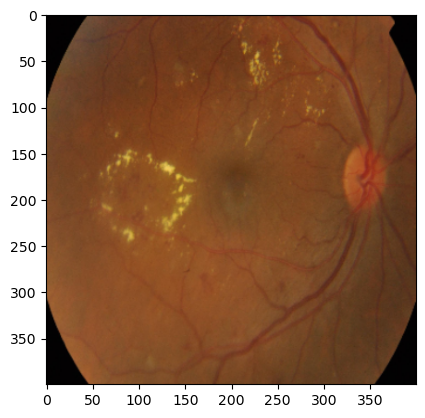

In [49]:
plt.imshow(crop_son)

In [50]:
## CLAHE - Kontrast Limitli Adaptif Histogram Eşitleme

In [51]:
lab = cv2.cvtColor(crop_son, cv2.COLOR_RGB2LAB)

In [52]:
lab.shape

(400, 400, 3)

In [53]:
l,a,b = cv2.split(lab)

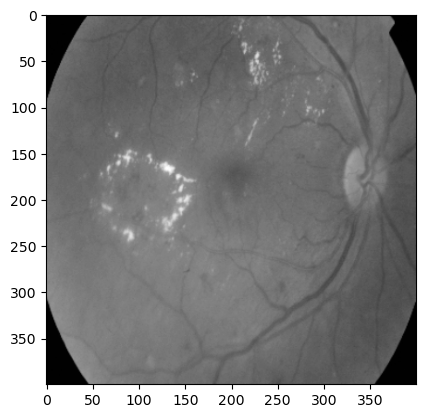

In [54]:
plt.imshow(l, cmap='gray')

In [55]:
l.shape

(400, 400)

In [56]:
düz = l.flatten()

In [57]:
düz.shape

(160000,)

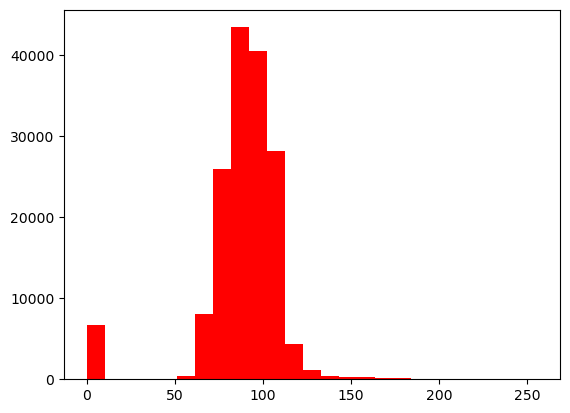

In [58]:
plt.hist(düz,25,[0,256], color = 'r')
plt.show()

In [59]:
clahe = cv2.createCLAHE(clipLimit=7.0,tileGridSize=((8,8)))
cl = clahe.apply(l)

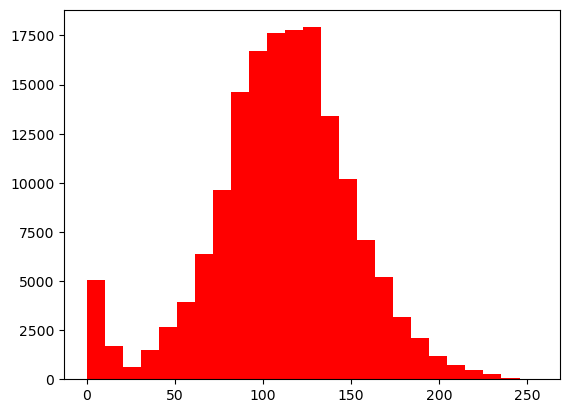

In [60]:
plt.hist(cl.flatten(),25,[0,256], color = 'r')
plt.show()

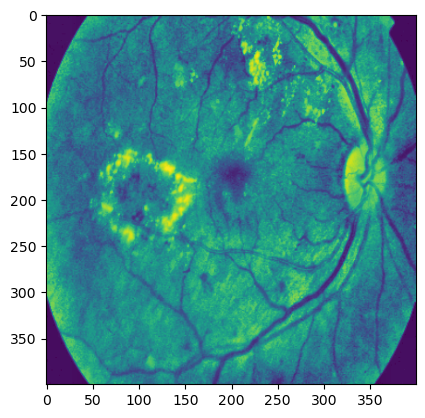

In [61]:
plt.imshow(cl)

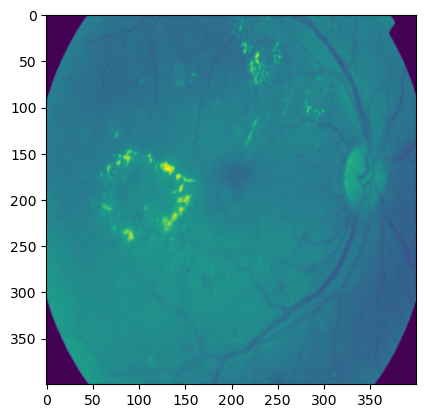

In [62]:
plt.imshow(l)

In [63]:
limg = cv2.merge((cl,a,b))

In [64]:
son = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)

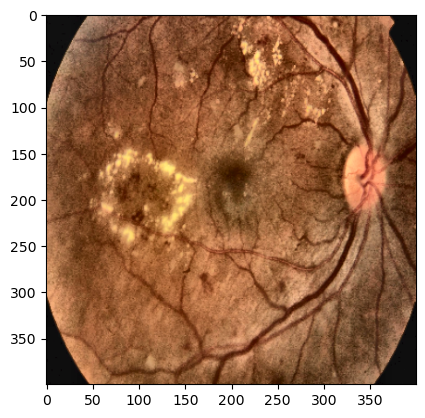

In [65]:
plt.imshow(son)

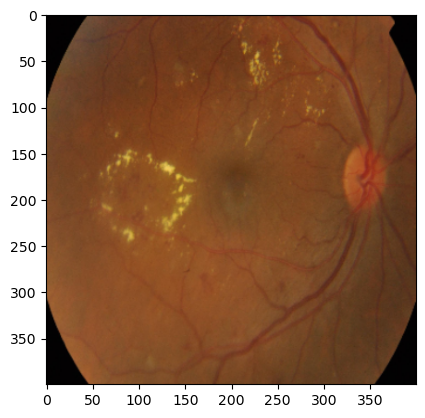

In [66]:
plt.imshow(crop_son)

In [67]:
med_son = cv2.medianBlur(son, 3)

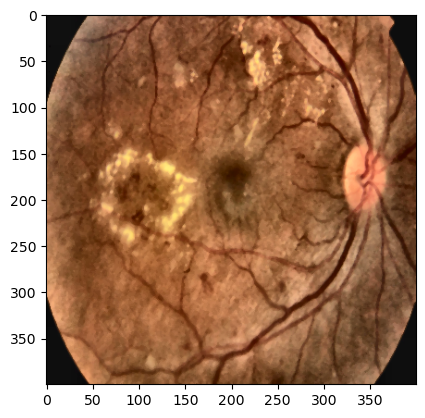

In [68]:
plt.imshow(med_son)

In [69]:
arka_plan = cv2.medianBlur(son, 37)

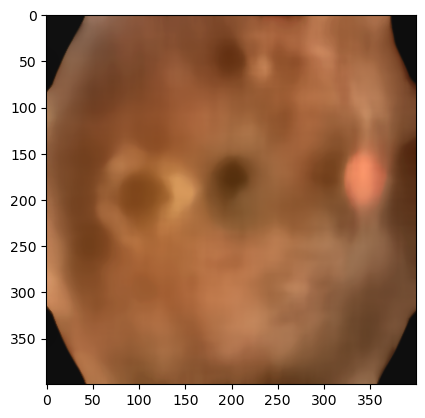

In [70]:
plt.imshow(arka_plan)

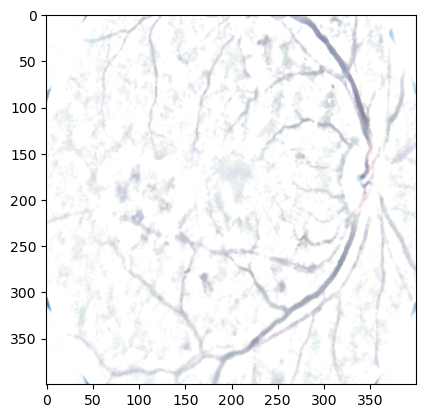

In [71]:
maske = cv2.addWeighted(med_son,1,arka_plan,-1,255)
plt.imshow(maske)

In [72]:
son_img = cv2.bitwise_and(maske,med_son)

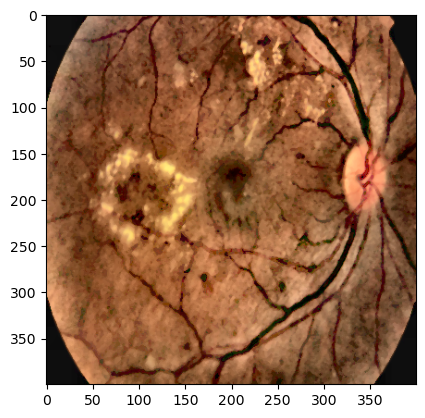

In [73]:
plt.imshow(son_img)

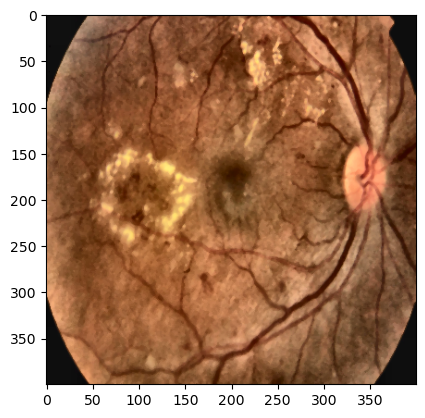

In [74]:
plt.imshow(med_son)

Yaptığımız tüm işlemleri tek bir for döngüsünde toplayıp, elimizdeki bütün görüntüleri bu döngüyle img_list ismindeki listeye kaydediyoruz.

In [76]:
img_list = []

from tqdm.notebook import tqdm
from tqdm import tqdm  # Widget yerine metin modu için


for i in tqdm(files):
    image = cv2.imread(path + 'train_images//'+i)
    image = cv2.resize(image,(400,400))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    kopya = image.copy()
    kopya = cv2.cvtColor(kopya, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(kopya,(5,5),0)
    thresh = cv2.threshold(blur,10,255, cv2.THRESH_BINARY)[1]
    kontur = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    kontur = kontur[0][0]
    kontur = kontur[:,0,:]
    x1 = tuple(kontur[kontur[:,0].argmin()])[0]
    y1 = tuple(kontur[kontur[:,1].argmin()])[1]
    x2 = tuple(kontur[kontur[:,0].argmax()])[0]
    y2 = tuple(kontur[kontur[:,1].argmax()])[1]
    x = int(x2-x1)*4//50
    y = int(y2-y1)*5//50
    kopya2 = image.copy()
    if x2-x1 >100 and y2-y1> 100:
        kopya2 = kopya2[y1+y : y2-y , x1+x : x2-x]
        kopya2 = cv2.resize(kopya2,(400,400))
    lab = cv2.cvtColor(kopya2, cv2.COLOR_RGB2LAB)
    l,a,b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=5.0,tileGridSize=((8,8)))
    cl = clahe.apply(l)
    limg = cv2.merge((cl,a,b))
    son = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    med_son = cv2.medianBlur(son, 3)
    arka_plan = cv2.medianBlur(son, 37)
    maske = cv2.addWeighted(med_son,1,arka_plan,-1,255)
    son_img = cv2.bitwise_and(maske,med_son)
    img_list.append(son_img)


100%|███████████████████████████████████████| 3662/3662 [03:26<00:00, 17.77it/s]


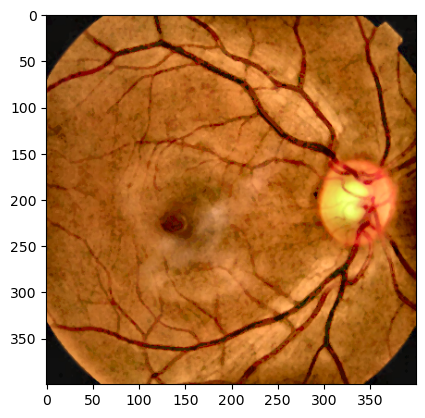

In [77]:
plt.imshow(img_list[6])

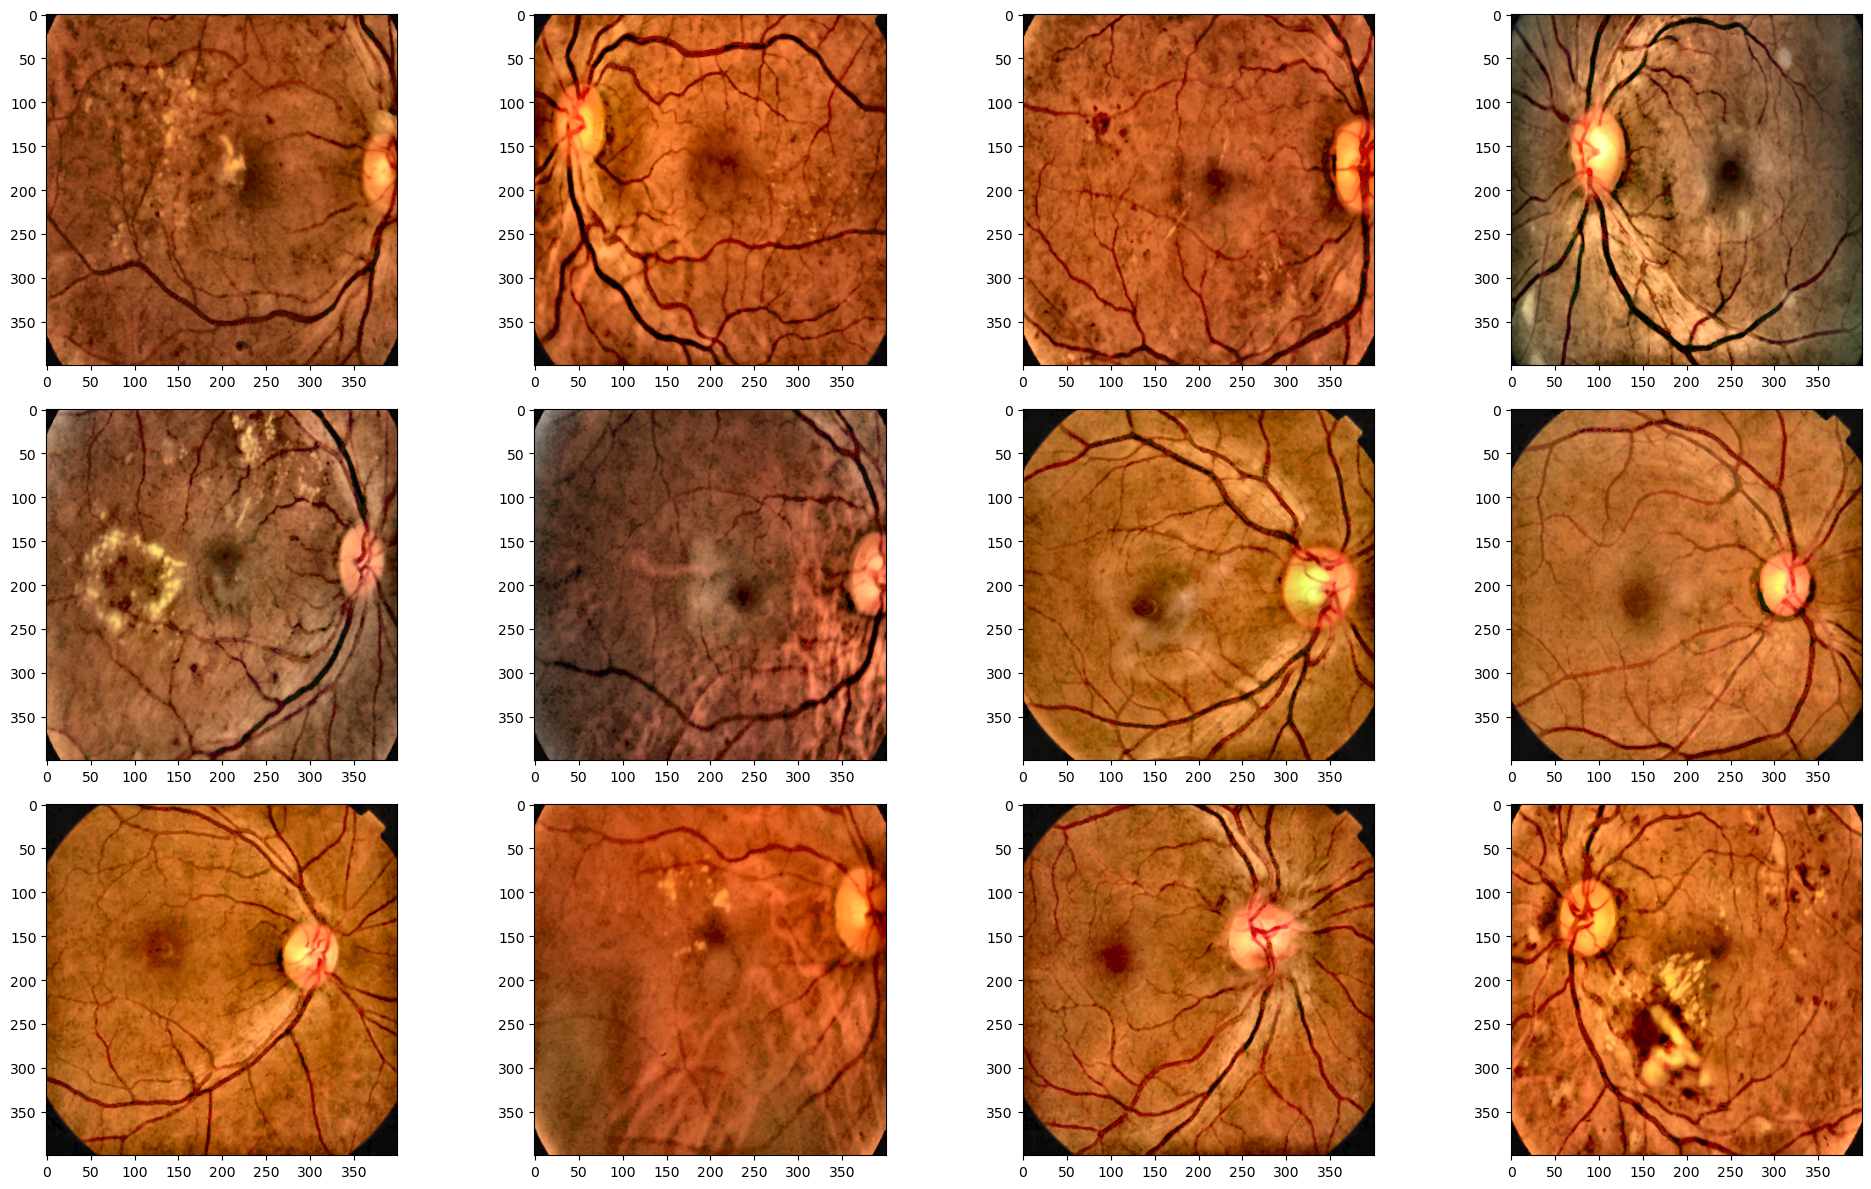

In [78]:
fig = plt.figure(figsize=(20,12))

for i in range(12):
    img = img_list[i]
    fig.add_subplot(3,4,i+1)
    plt.imshow(img)

plt.tight_layout()

In [79]:
df['diagnosis']

0       2
1       4
2       1
3       0
4       0
       ..
3657    2
3658    0
3659    2
3660    0
3661    2
Name: diagnosis, Length: 3662, dtype: int64

one code encoding (dummy tarzı bir veri manipulasyon işlemi -bitsel)

In [81]:
y_train = pd.get_dummies(df['diagnosis']).values.astype(int)

In [82]:
y_train

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]])

In [83]:
y_train[1]

array([0, 0, 0, 0, 1])

In [84]:
df['diagnosis'][1]      # 1. index 4. seviye retinopatiymiş 1 olmuş.

4

In [85]:
import numpy as np
y_train_son = np.ones(y_train.shape, dtype='uint8')

In [86]:
y_train_son

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       ...,
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [87]:
y_train_son[:,4] = y_train[:,4] #elimizdeki sınıflandırma verilerini 4. derece retinopati verilerini 1 lerden oluşan arraye eşitledik.

In [88]:
y_train_son

array([[1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0],
       ...,
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0]], dtype=uint8)

In [89]:
import numpy as np

In [90]:
np.logical_or(0,0)

False

In [91]:
np.logical_or(1,0)

True

In [92]:
np.logical_or(0,1)

True

In [93]:
np.logical_or(1,1)

True

In [94]:
for i in range(3,-1,-1):
    y_train_son[:,i] = np.logical_or(y_train[:,i], y_train_son[:,i+1])
   # son indexi almadan (değişiklik yapma) 3. indexten başlayarak 2 ve 1 olmak üzere bütün indezlerde 1 değeri arıyor.eğer bulamazsa 4 indexi de 0 a eşitliyor. eğer 1 değerini bulursa or da 1 tane bile 1 olursa 1 olmasından ötürü bütün indexleri 1 e eşitliyor. 

In [95]:
y_train_son

array([[1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0],
       ...,
       [1, 1, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0]], dtype=uint8)

In [96]:
 y_train

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]])

In [97]:
#elimizdeki verilerin hepsi aynı varsayılabilir (araba-ev, kedi-köpek gibi tamaen farklı veri görüntüleri değil)sadece bazılarında diğerlerine nazaran ek patolojik bulgular var ve bu da retinopati hastalığının derecesini değiştiriyor. Bu şekilde model daha doğru sonuç verebilecektir.

In [98]:
x_train = np.array(img_list)

In [99]:
x_train.shape

(3662, 400, 400, 3)

In [100]:
y_train_son.shape

(3662, 5)

In [101]:
x_train = np.array(img_list)

In [102]:
from sklearn.model_selection import train_test_split

x_train, x_val , y_train, y_val = train_test_split(x_train,
                                                   y_train_son,
                                                   test_size=0.15,
                                                   random_state=2019,
                                                   shuffle=True)

In [103]:
x_train.shape, x_val.shape , y_train.shape, y_val.shape

((3112, 400, 400, 3), (550, 400, 400, 3), (3112, 5), (550, 5))

In [104]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1.0/255,  # Görüntüleri 0-1 aralığında normalize eder
    horizontal_flip=True,
    vertical_flip=True
)

data_generator = datagen.flow(x_train, y_train, batch_size=2, seed=2020)


In [105]:
from efficientnet.keras import EfficientNetB5

In [106]:
örnek_model = EfficientNetB5()

In [107]:
örnek_model.summary()
#bu modelde ilgileneceğimiz son 3 katman.Biz modelin eğitiminde kullanırken bu son 3 katmanı kaldırıp yerine kendi model
#iimize uygun katmanları ekleyeceğiz.

Model: "efficientnet-b5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 456, 456,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 228, 228,  │      1,296 │ input_layer[0][0] │
│                     │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 228, 228,  │        192 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 228, 228,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 228, 228,  │        432 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 228, 228,  │        192 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 228, 228,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 48)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 48)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 12)  │        588 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 48)  │        624 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 228, 228,  │          0 │ block1a_activati… │
│ (Multiply)          │ 48)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 228, 228,  │      1,152 │ block1a_se_excit… │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 228, 228,  │         96 │ block1a_project_… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_dwconv      │ (None, 228, 228,  │        216 │ block1a_project_… │
│ (DepthwiseConv2D)   │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_bn          │ (None, 228, 228,  │         96 │ block1b_dwconv[0… │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_activation  │ (None, 228, 228,  │          0 │ block1b_bn[0][0]

 Total params: 30,562,520 (116.59 MB)

 Trainable params: 30,389,784 (115.93 MB)

 Non-trainable params: 172,736 (674.75 KB)

In [108]:
örnek_model2 = EfficientNetB5(include_top=False)

In [109]:
#Bu seçeneği ''False'' yaptığımızda modelin sonundaki tahmin yapan kısmı kaldırıyor. Bu sayede kendi verilerimize uygun tahmin katmanı oluşturabiliyoruz.

In [110]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(EfficientNetB5(weights='imagenet',include_top=False, input_shape=(400,400,3)))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5,activation = 'sigmoid'))

#modelin son 3 katmanını kendi modelimize uygun olacak şekilde kendimiz oluituruyoruz.

In [111]:
from keras.optimizers import Adam
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.00005),metrics=['accuracy'])

In [112]:
from keras.callbacks import ReduceLROnPlateau

lr = ReduceLROnPlateau(monitor = 'val_loss',
                      patience = 3,
                      verbose = 1,
                      mode='auto',
                      factor=0.25,
                      min_lr=0.000001)

In [226]:
# TensorFlow ve Keras sürümlerini kontrol edelim
import tensorflow as tf
import keras
print("TensorFlow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

# Gerekli kütüphaneleri import edelim
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Activation
from tensorflow.keras.applications import EfficientNetB0

# Eğer swish aktivasyonu bir hata veriyorsa manuel olarak tanımlayalım
@tf.keras.utils.register_keras_serializable()
def swish(x):
    return x * tf.nn.sigmoid(x)

# Swish aktivasyonunu varsayılan aktivasyonlar listesine ekleyelim
tf.keras.activations.swish = swish

# EfficientNet modelini yükleyelim
model = EfficientNetB0(weights=None, input_shape=(200, 200, 3), classes=10)  # Örnek: 10 sınıflı bir çıktı

# Modeli derleme (compile) işlemi
model.compile(
    optimizer='adam',               # Optimizasyon algoritması
    loss='sparse_categorical_crossentropy',  # Kayıp fonksiyonu
    metrics=['accuracy']            # Ölçüm metriği
)

# Eğitim için ReduceLROnPlateau callback'ini tanımlayalım
lr = ReduceLROnPlateau(
    monitor='val_loss',
    patience=3,
    verbose=1,
    mode='auto',
    factor=0.25,
    min_lr=0.000001
)

# Dummy veri setleri (data_generator, x_val ve y_val yerinize uygun veri koymalısınız)
import numpy as np
data_generator = (
    tf.data.Dataset.from_tensor_slices(
        (np.random.random((1000, 200, 200, 3)), np.random.randint(0, 10, 1000))
    )
    .batch(32)
    .repeat()  # Veri setini sonsuz döngüye sokuyoruz
)

x_val = np.random.random((200, 200, 200, 3))
y_val = np.random.randint(0, 10, (200,))



TensorFlow Version: 2.18.0
Keras Version: 3.7.0


In [ ]:

# Modeli eğitme
history = model.fit(
    data_generator,
    steps_per_epoch=1000,
    epochs=5,
    validation_data=(x_val, y_val),
    callbacks=[lr]
)

print("Model eğitimi tamamlandı.")

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2554s 3s/step - accuracy: 0.5703 - loss: 1.5307 - val_accuracy: 0.0500 - val_loss: 9.6563 - learning_rate: 0.0010
Epoch 2/5
 323/1000 ━━━━━━━━━━━━━━━━━━━━ 32:37 3s/step - accuracy: 0.9381 - loss: 0.2109